In [1]:
import numpy as np
import tensorflow as tf
from scipy import io
import matplotlib.pyplot as plt
from tensorflow import keras
%matplotlib inline

mat_file = io.loadmat('test_32x32.mat')

In [2]:
x = mat_file['X']
y = mat_file['y']

In [6]:
x = np.transpose(x, (3, 0, 1, 2))
y = y[:,0]
y[y == 10] = 0
x.shape, y.shape, set(y)

((26032, 32, 32, 3), (26032,), {0, 1, 2, 3, 4, 5, 6, 7, 8, 9})

In [7]:
m = len(x) // 2
x_train, x_test = x[:m], x[m:m*2]
y_train, y_test = y[:m], y[m:m*2]

x_train.shape, y_train.shape

((13016, 32, 32, 3), (13016,))

In [3]:
def attach_3_image(x, y):
    m = len(y)
    m = m - m%3
    x = x[:m]
    y = y[:m] # 3의 배수의 데이터 수 사용
    x_0 = x[::3]
    x_1 = x[1::3]
    x_2 = x[2::3]
    x_attach = np.concatenate((x_0, x_1, x_2), axis=2)
    y_attach = np.reshape(y, [-1,3])
    return x_attach, y_attach

In [8]:
x3_train, y3_train = attach_3_image(x_train, y_train)
x3_test, y3_test = attach_3_image(x_test, y_test)
x3_train.shape, y3_train.shape, x3_test.shape, y3_test.shape

((4338, 32, 96, 3), (4338, 3), (4338, 32, 96, 3), (4338, 3))

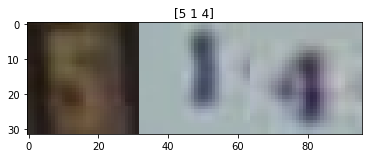

In [9]:
i = 4
plt.title(str(y3_train[i]))
plt.imshow(x3_train[i])

## simple Model

In [13]:
model = keras.Sequential()
model.add(keras.layers.Input((32,32*3,3)))
model.add(keras.layers.Conv2D(96, kernel_size=(11,11), padding='same'))
model.add(keras.layers.ReLU())
model.add(keras.layers.MaxPool2D((2,2), strides=(2,2), padding='valid'))
model.add(keras.layers.Conv2D(256, kernel_size=(5,5), padding='same'))
model.add(keras.layers.ReLU())
model.add(keras.layers.MaxPool2D((2,2), strides=(2,2), padding='valid'))
model.add(keras.layers.Conv2D(256, kernel_size=(3,3), padding='same'))
model.add(keras.layers.ReLU())
model.add(keras.layers.Conv2D(256, kernel_size=(3,3), padding='same'))
model.add(keras.layers.ReLU())
model.add(keras.layers.Conv2D(256, kernel_size=(3,3), padding='same'))
model.add(keras.layers.ReLU())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation=keras.layers.LeakyReLU()))
model.add(keras.layers.Dense(10, activation=keras.layers.Softmax()))
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [14]:
model.fit(x3_train, y3_train, epochs=10)

Train on 4338 samples
Epoch 1/10
  32/4338 [..............................] - ETA: 32s

ValueError: Can not squeeze dim[1], expected a dimension of 1, got 3 for 'metrics/accuracy/Squeeze' (op: 'Squeeze') with input shapes: [?,3].